In [2]:
import pandas as pd
wine=pd.read_csv('https://bit.ly/wine_csv_data')

In [3]:
data=wine[['alcohol', 'sugar', 'pH']]

In [4]:
target=wine['class'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(data, target, test_size=0.2, random_state=42)

In [6]:
sub_input, val_input, sub_target, val_target=train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [7]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [8]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


In [9]:
from sklearn.model_selection import cross_validate
scores=cross_validate(dt,train_input,train_target)
print(scores)

{'fit_time': array([0.01578498, 0.01054573, 0.00887704, 0.00723004, 0.00610304]), 'score_time': array([0.00181508, 0.00129104, 0.00097203, 0.00098777, 0.0007782 ]), 'test_score': array([0.87019231, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [10]:
import numpy as np
print(np.mean(scores['test_score']))

0.8554925223957948


In [11]:
from sklearn.model_selection import StratifiedKFold
scores=cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))


0.8554925223957948


In [12]:
splitter=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores=cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8581873425226026


In [17]:
from sklearn.model_selection import GridSearchCV
params={'min_impurity_decrease':[0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [18]:
gs=GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [19]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [20]:
dt=gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [21]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [22]:
print(gs.cv_results_['mean_test_score'])
best_index=np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

[0.86800067 0.86453617 0.86492226 0.86780891 0.86761605]
{'min_impurity_decrease': 0.0001}


In [23]:
params={'min_impurity_decrease':np.arange(0.0001, 0.001, 0.0001), 'max_depth':range(5, 20, 1), 'min_samples_split':range(2,100, 10)}

In [24]:
gs=GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [25]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [26]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


In [28]:
from scipy.stats import uniform, randint

In [29]:
rgen=randint(0,10)
rgen.rvs(10)

array([6, 9, 8, 1, 1, 3, 1, 3, 4, 9])

In [30]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([117,  91, 117,  99,  94,  99,  90, 101,  94,  98]))

In [31]:
ugen=uniform(0,1)
rgen.rvs(10)

array([1, 1, 0, 7, 8, 5, 9, 7, 2, 3])

In [32]:
params={'min_impurity_decrease':uniform(0.0001, 0.001), 'max_depth':randint(20,50), 'min_samples_split':randint(2,25), 'min_samples_leaf':randint(1, 25)}

In [40]:
from sklearn.model_selection import RandomizedSearchCV
gs=RandomizedSearchCV(DecisionTreeClassifier(random_state=42, splitter='random'), params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42,
                                                    splitter='random'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x151cf30d0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x151cf36d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x151cf3c70>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1513dd9f0>},
                   random_state=42)

In [41]:
print(gs.best_params_)

{'max_depth': 43, 'min_impurity_decrease': 0.00011407982271508446, 'min_samples_leaf': 19, 'min_samples_split': 18}


In [42]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8458726956392981


In [43]:
dt=gs.best_estimator_
print(dt.score(test_input, test_target))

0.786923076923077


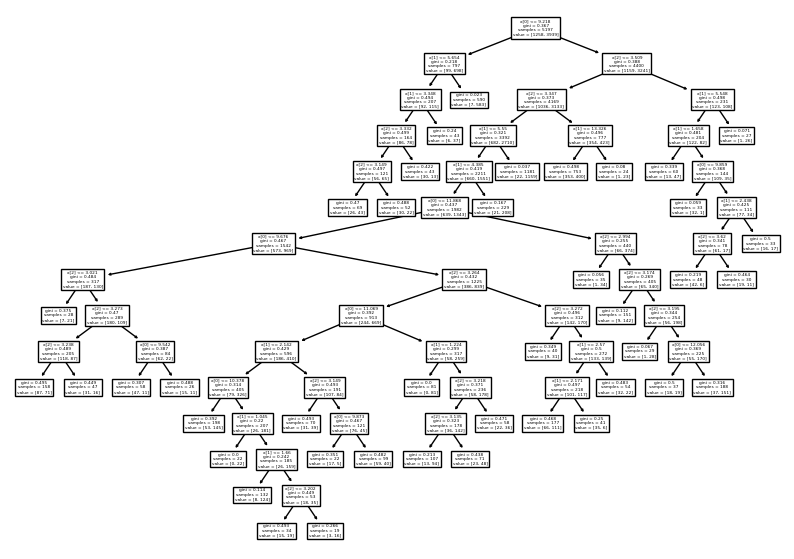

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()